In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
# we import the data
from sqlite3 import connect

conn = connect('reviews.db')
df = pd.read_sql('SELECT * FROM reviews', conn)
conn.close()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     280 non-null    object
 1   content   280 non-null    object
 2   rating    280 non-null    int64 
 3   location  280 non-null    object
 4   source    280 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.1+ KB


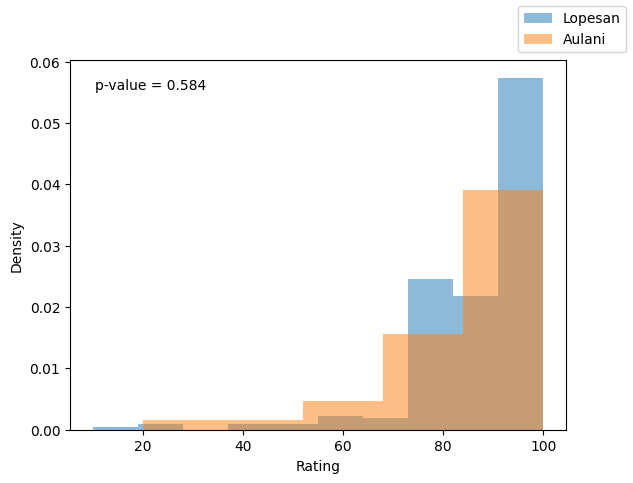

In [3]:
lopesan = df[df['location'] == 'Lopesan Costa Meloneras Resort & Spa']

aulani = df[df['location'] == 'Aulani']

res = stats.ttest_ind(lopesan['rating'], aulani['rating'], equal_var=False)

fig, ax = plt.subplots()

ax.hist(lopesan['rating'], density=True, bins=10, alpha=0.5, label='Lopesan')
ax.hist(aulani['rating'], density=True, bins=5, alpha=0.5, label='Aulani')

ax.set_xlabel('Rating')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, 'p-value = {:.3f}'.format(res.pvalue), transform=ax.transAxes, va='top')
fig.legend()

plt.show()